# Homework 4: Data Visualization
- **Name**:  Huize Hou
- **UB Username**: huizehou
- **UB Person Number**:  50359765

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('scatter_data.csv')

In [18]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [19]:
a = [x.min(), x.max()]
b = [y[x.idxmin()], y[x.idxmax()]]
a
b

[330.376289, 335.755833]

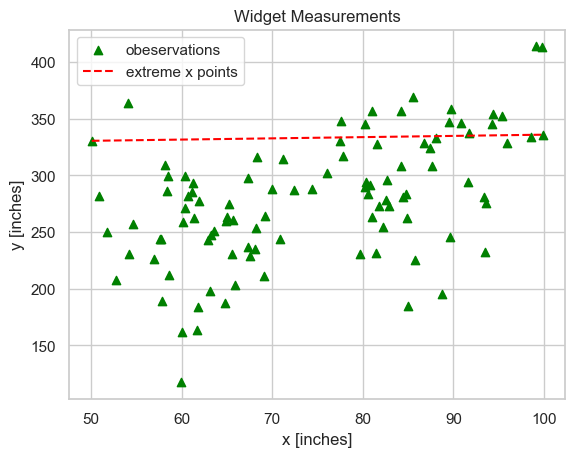

In [20]:
plt.scatter(x, y, marker='^', color='green', label='obeservations')
plt.plot(a,b, linestyle='--', color='red', label='extreme x points')
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.legend()

### Problem 2 - Histogram

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df2 = pd.read_csv('student_grades.csv')

In [22]:
bins = [0, 60, 70, 80, 90, 100.00001]
labels = ['F', 'D', 'C', 'B', 'A']

df2['Grade'] = pd.cut(df2.iloc[:,1], bins = bins, labels = labels, right = False)
grade_counts = df2['Grade'].value_counts().sort_index()
df2

,% studentID,avgScore,Grade
0,0,81.563259,B
1,1,67.426527,D
2,2,86.415197,B
3,3,80.387361,B
4,4,76.669249,C
...,...,...,...
70,70,64.622963,D
71,71,86.951039,B
72,72,85.339374,B
73,73,69.082293,D


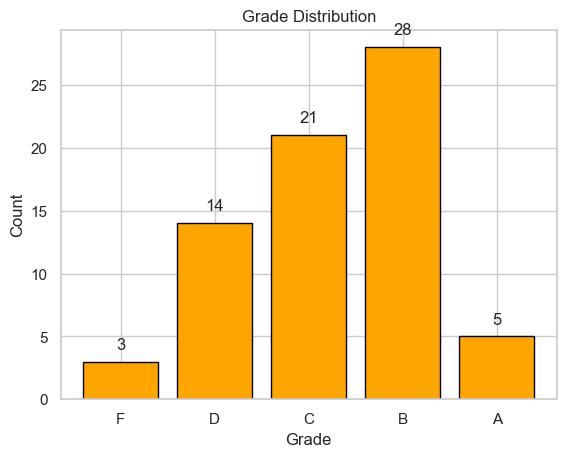

In [23]:
a,b = plt.subplots()
plt.bar(grade_counts.index, grade_counts, color = 'orange', edgecolor = 'black')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
for i, count in enumerate(grade_counts):
    b.text(i, count + 1, str(count), ha = 'center')


### Problem 3 - Barplot and Boxplot in the Same Figure

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df3 = pd.read_csv('solution_data.csv')

In [25]:
op = df3[df3.iloc[:,1] == 'optimal']['Value'].reset_index(drop = True)
ts = df3[df3.iloc[:,1] == 'tabu search']['Value'].reset_index(drop = True)
sa = df3[df3.iloc[:,1] == 'simulated annealing']['Value'].reset_index(drop = True)
ga = df3[df3.iloc[:,1] == 'genetic algorithm']['Value'].reset_index(drop = True)


In [26]:
gap_ots = (op-ts)/op*100
gap_osa = (op-sa)/op*100
gap_oga = (op-ga)/op*100
gap_plt = pd.Series([gap_oga.mean(),gap_osa.mean(),gap_ots.mean()], index = ['genetic algorithm','simulated annealing','tabu search'])
gap_bplt = pd.concat([gap_oga, gap_osa, gap_ots], axis = 1)

gap_bplt.columns = ['genetic algorithm','simulated annealing','tabu search']
gap_bplt

,genetic algorithm,simulated annealing,tabu search
0,32.147955,54.732600,32.855444
1,34.573643,30.060710,15.651159
2,34.027413,56.900812,44.991033
3,32.186970,48.344138,24.379735
4,32.819833,56.088454,23.033096
5,34.198640,23.985387,25.722712
6,29.460207,41.915052,44.724289
7,29.196937,63.742931,30.187632
8,34.653133,56.713595,39.982545
9,31.716673,20.377158,31.382831


Text(0.5, 0.98, 'Comparison of Optimality Gaps for Heuristics')

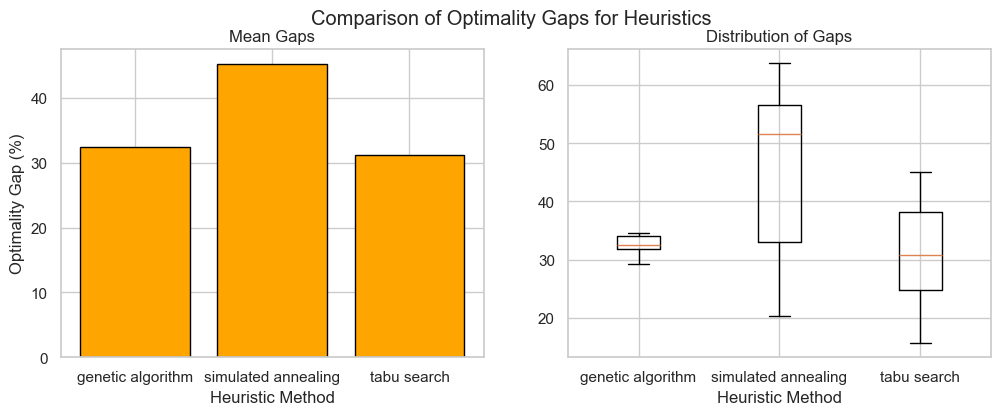

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,4])
ax1.bar(gap_plt.index, gap_plt, color = 'orange', edgecolor = 'black')
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Optimality Gap (%)')
ax1.set_title('Mean Gaps')
ax2.boxplot(gap_bplt,labels = ['genetic algorithm','simulated annealing','tabu search'])
ax2.set_xlabel('Heuristic Method')
ax2.set_title('Distribution of Gaps')
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

--- 
## Part 2 - Explore New Plot Types

It is a plot called "residuals vs. fitted plot". Which is residuals on the y axis and fitted values (estimated responses) on the x axis. Data was used from the first question. And assume a randome linear regression relationship between x and y. Check if the regression fit. If stright and close to y=0, it fits, otherwise, not fit.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/residplot.html
- **URL of Sample Data**:  https://github.com/IE-555/fall2023/blob/main/Homework/HW_4_data_viz/scatter_data.csv

[Text(0.5, 0, 'fitted value'), Text(0, 0.5, 'residual')]

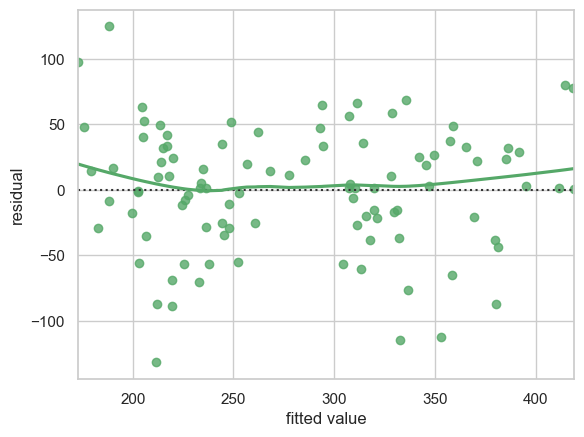

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
df = pd.read_csv('scatter_data.csv')
# Extract x value
x = df.iloc[:,0]
# Assign a random linear regression(it could be calculated in real life) to x for prediting y
x_pred = 50 + 1.2 * x + 0.025 * x * x
# Extract y value, which is actual value of y
y = df.iloc[:,1]

# Plot the residuals after fitting a linear model to check how fit the predition is comparing with y
ax = sns.residplot(x=x_prid, y=y, lowess=True, color="g")
ax.set(xlabel='fitted value', ylabel='residual')

In [29]:
# It's OK to break up your code into multiple cells.

In [30]:
# It's also OK to include comments, 
# either in Markdown or as Python code comments.

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 